Importing and checking the nature of the dataset. 

In [2]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
ds_salaries = pd.read_csv('ds_salaries.csv')

# Display the first few rows of the DataFrame to inspect its contents
ds_salaries.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Applying the .info() method on the dataset to get a summary of the data
info_summary = ds_salaries.info()

# Applying the .describe() method to get descriptive statistics for the numerical columns
describe_summary = ds_salaries.describe()

describe_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [4]:
# Checking for missing values in the dataset
missing_values = ds_salaries.isnull().sum()

missing_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
# Checking value counts for each column in the dataset
value_counts = {column: ds_salaries[column].value_counts() for column in ds_salaries.columns}

value_counts

{'work_year': work_year
 2023    1785
 2022    1664
 2021     230
 2020      76
 Name: count, dtype: int64,
 'experience_level': experience_level
 SE    2516
 MI     805
 EN     320
 EX     114
 Name: count, dtype: int64,
 'employment_type': employment_type
 FT    3718
 PT      17
 CT      10
 FL      10
 Name: count, dtype: int64,
 'job_title': job_title
 Data Engineer                          1040
 Data Scientist                          840
 Data Analyst                            612
 Machine Learning Engineer               289
 Analytics Engineer                      103
                                        ... 
 Principal Machine Learning Engineer       1
 Azure Data Engineer                       1
 Manager Data Management                   1
 Marketing Data Engineer                   1
 Finance Data Analyst                      1
 Name: count, Length: 93, dtype: int64,
 'salary': salary
 100000    112
 150000    100
 120000     99
 160000     85
 130000     85
          ... 

Here is the brief summary of the dataset: 

**1. Work Year:**

2023: 1,785 entries

2022: 1,664 entries

2021: 230 entries

2020: 76 entries

**2. Experience Level:**

SE: 2,516 entries

MI: 805 entries

EN: 320 entries

EX: 114 entries

**3. Employment Type:**

FT (Full Time): 3,718 entries

PT (Part Time): 17 entries

CT (Contract): 10 entries

FL (Freelance): 10 entries

**4.Job Title:**

There are 93 unique job titles. Some examples are:

Data Engineer: 1,040 entries

Data Scientist: 840 entries

Data Analyst: 612 entries

Machine Learning Engineer: 289 entries

Analytics Engineer: 103 entries

**5. Salary:**

There are 815 unique salary values.

**6. Salary Currency:**

USD: 3,224 entries

EUR: 236 entries

GBP: 161 entries

(and others...)

**7. Salary In USD:**

There are 1,035 unique salary values when converted to USD.

**8. Employee Residence:**

US: 3,004 entries

GB: 167 entries

CA: 85 entries

(and so on, with a total of 78 unique countries)

**9. Remote Ratio:**

0% (No remote work): 1,923 entries

100% (Fully remote): 1,643 entries

50% (Half remote): 189 entries

**10. Company Location:**

US: 3,040 entries

GB: 172 entries

CA: 87 entries

(and so on, with a total of 72 unique countries)

**11. Company Size:**

M (Medium): 3,153 entries

L (Large): 454 entries

S (Small): 148 entries

Now proceeding with the EDA in the following manner:

**Distribution Analysis:** We'll visualize the distribution of key numeric variables like salary_in_usd and remote_ratio.

**Categorical Analysis:** We'll analyze the distribution of some key categorical variables like experience_level, employment_type, company_size, and job_title.

**Salary Analysis:** We'll analyze how the salary varies with factors like experience level, company size, and employment type.

**Correlation Analysis:** We'll see if there's any correlation between the numeric variables.

Beginning with the Distribution Analysis.

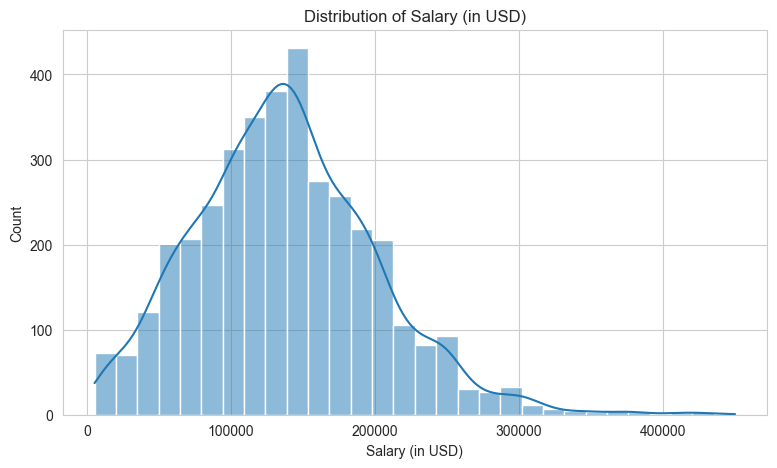

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 5))

# Plotting the distribution of salary_in_usd
plt.subplot(1, 2, 1)
sns.histplot(ds_salaries['salary_in_usd'], kde=True, bins=30)
plt.title('Distribution of Salary (in USD)')
plt.xlabel('Salary (in USD)')
plt.ylabel('Count')

plt.show()

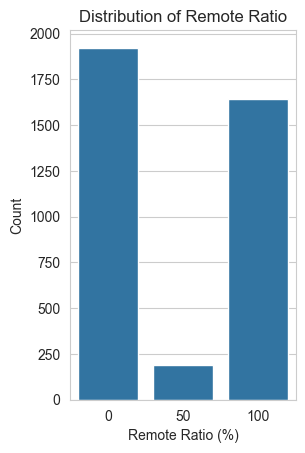

In [7]:
# Plotting the distribution of remote_ratio
plt.subplot(1, 2, 2)
sns.countplot(x='remote_ratio', data=ds_salaries)
plt.title('Distribution of Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Count')

plt.show()

Here are the observations from the distribution analysis:

* **Distribution of Salary (in USD):**

The majority of salaries are clustered around the lower end, indicating that most data science professionals in this dataset earn below $200,000.
There are a few outliers on the higher end, which could represent senior roles or highly specialized roles in the data science domain.

* **Distribution of Remote Ratio:**

A significant number of employees do not work remotely at all (0% remote ratio).
Another substantial group works fully remotely (100% remote ratio).
Only a small fraction of employees have a 50% remote work arrangement.

Next, moving on to the Categorical Analysis to understand the distribution of key categorical variables.

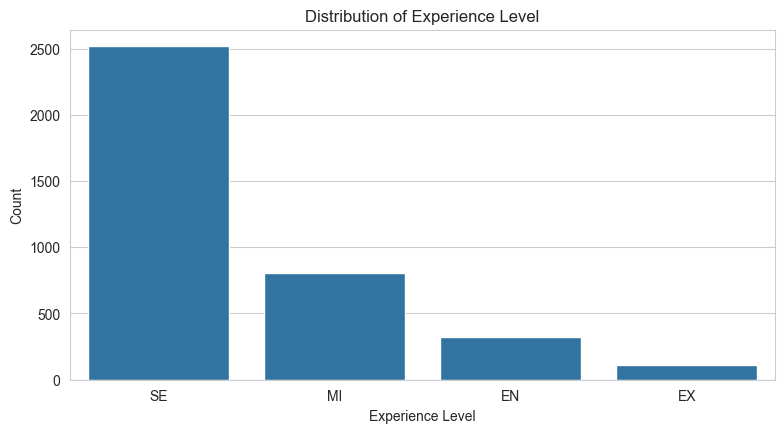

In [8]:
# Initialize the figure
plt.figure(figsize=(20, 10))

# Plotting the distribution of experience_level
plt.subplot(2, 2, 1)
sns.countplot(x='experience_level', data=ds_salaries, order=ds_salaries['experience_level'].value_counts().index)
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')


plt.show()


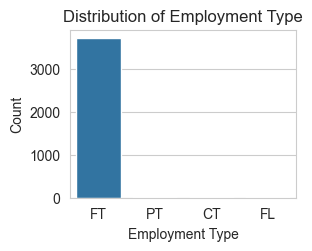

In [9]:
# Plotting the distribution of employment_type
plt.subplot(2, 2, 2)
sns.countplot(x='employment_type', data=ds_salaries, order=ds_salaries['employment_type'].value_counts().index)
plt.title('Distribution of Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')

plt.show()

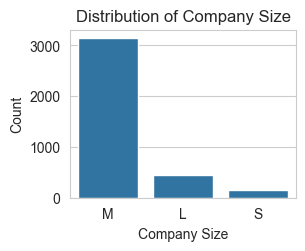

In [10]:
# Plotting the distribution of company_size
plt.subplot(2, 2, 3)
sns.countplot(x='company_size', data=ds_salaries, order=ds_salaries['company_size'].value_counts().index)
plt.title('Distribution of Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')

plt.show()

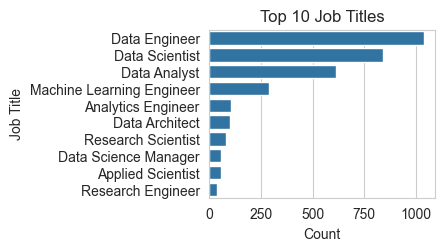

In [11]:
# Since there are many job titles, we'll just display the top 10 for clarity
plt.subplot(2, 2, 4)
top_job_titles = ds_salaries['job_title'].value_counts().head(10).index
sns.countplot(y='job_title', data=ds_salaries, order=top_job_titles)
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

plt.show()

Here are the observations from the categorical analysis:

* **Distribution of Experience Level:**

The majority of entries in the dataset are from individuals with the Senior-level (SE) experience, followed by Mid-level (MI), Entry-level (EN), and Executive-level (EX). We might need more information to decipher the exact meanings of these abbreviations, but it's clear that Senior-level (SE) is the most common experience level.

* **Distribution of Employment Type:**

Most individuals are employed full-time (FT), with only a few in part-time, contract, or freelance roles.

* **Distribution of Company Size:**

A significant number of individuals work in medium-sized companies, followed by large and then small companies.

* **Top 10 Job Titles:**

Data Engineer, Data Scientist, and Data Analyst are the top three job titles in the dataset, with ML Engineer being the most common.

Now analyzing how salary varies with different factors by performing Salary Analysis.

d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


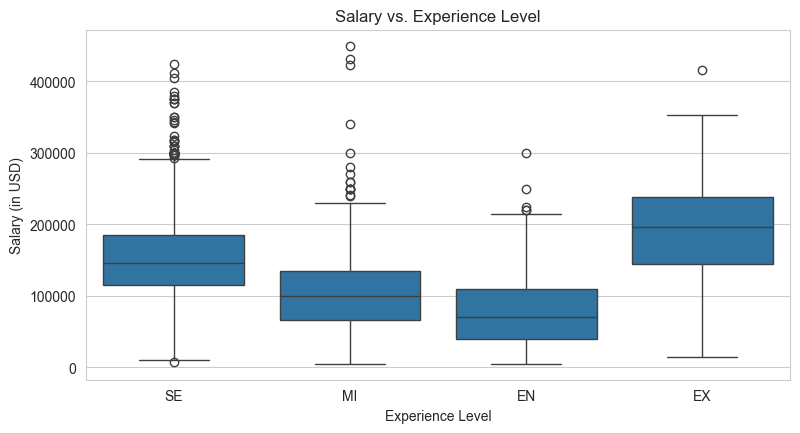

In [12]:
# Initialize the figure
plt.figure(figsize=(20, 10))

# Salary vs. Experience Level
plt.subplot(2, 2, 1)
sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_salaries)
plt.title('Salary vs. Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')

plt.show()


d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


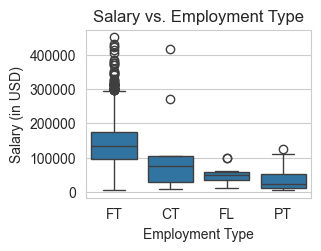

In [13]:
# Salary vs. Employment Type
plt.subplot(2, 2, 2)
sns.boxplot(x='employment_type', y='salary_in_usd', data=ds_salaries)
plt.title('Salary vs. Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')

plt.show()

d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


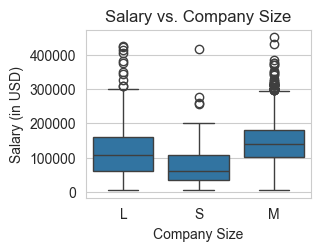

In [14]:
# Salary vs. Company Size
plt.subplot(2, 2, 3)
sns.boxplot(x='company_size', y='salary_in_usd', data=ds_salaries)
plt.title('Salary vs. Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (in USD)')

plt.show()

d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


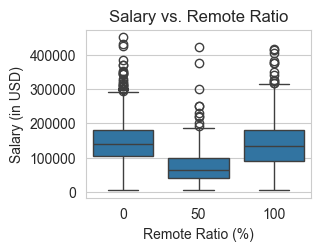

In [15]:
# Salary vs. Remote Ratio
plt.subplot(2, 2, 4)
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=ds_salaries)
plt.title('Salary vs. Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')

plt.show()

Here are the observations from the salary analysis:

* **Salary vs. Experience Level:**

There's a clear trend that as experience level increases, the median salary also increases.
The Executive-level (EX) experience has the highest median salary, followed by Entry-level(EN), Mid-level (MI), and Senior-level (SE). The spread of salaries (as shown by the height of the boxes) also seems to increase with experience, indicating more variability in salaries for more experienced roles.

* **Salary vs. Employment Type:**

Full-time employees (FT) generally have higher median salaries compared to other employment types.
Contract (CT) and freelance (FL) roles have wider salary distributions, indicating variability in the contract and freelance market.

* **Salary vs. Company Size:**

Large companies tend to offer higher median salaries compared to medium and small companies. This could be because larger companies have more resources and typically attract more experienced talent.

* **Salary vs. Remote Ratio:**

There doesn't seem to be a significant difference in the median salaries based on the remote working ratio. However, fully remote roles (100% remote) have a slightly lower median salary compared to non-remote roles.

Next, proceeding with the Correlation Analysis to determine if there are any significant relationships between the numeric variables.

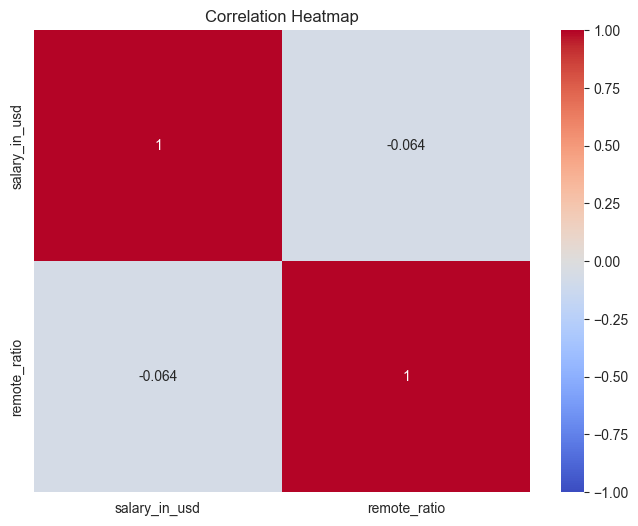

In [16]:
# Calculating the correlation matrix for the numeric columns
correlation_matrix = ds_salaries[['salary_in_usd', 'remote_ratio']].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


The correlation indicates that there is no significant linear relationship between the salary in USD and the percentage of remote work.

Performing Location Analysis by exploring how salaries for data science roles vary across different countries or regions. We'll focus on:

* **Average Salary by Country:** We'll visualize the average salary in USD for data science roles across different countries.

* **Job Demand by Country:** We'll visualize the number of job listings (or entries) for each country, which can give us an idea about the demand for data science roles in those countries.

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\65364173.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Salary', y='Country', data=country_analysis.head(20), palette="viridis")
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning

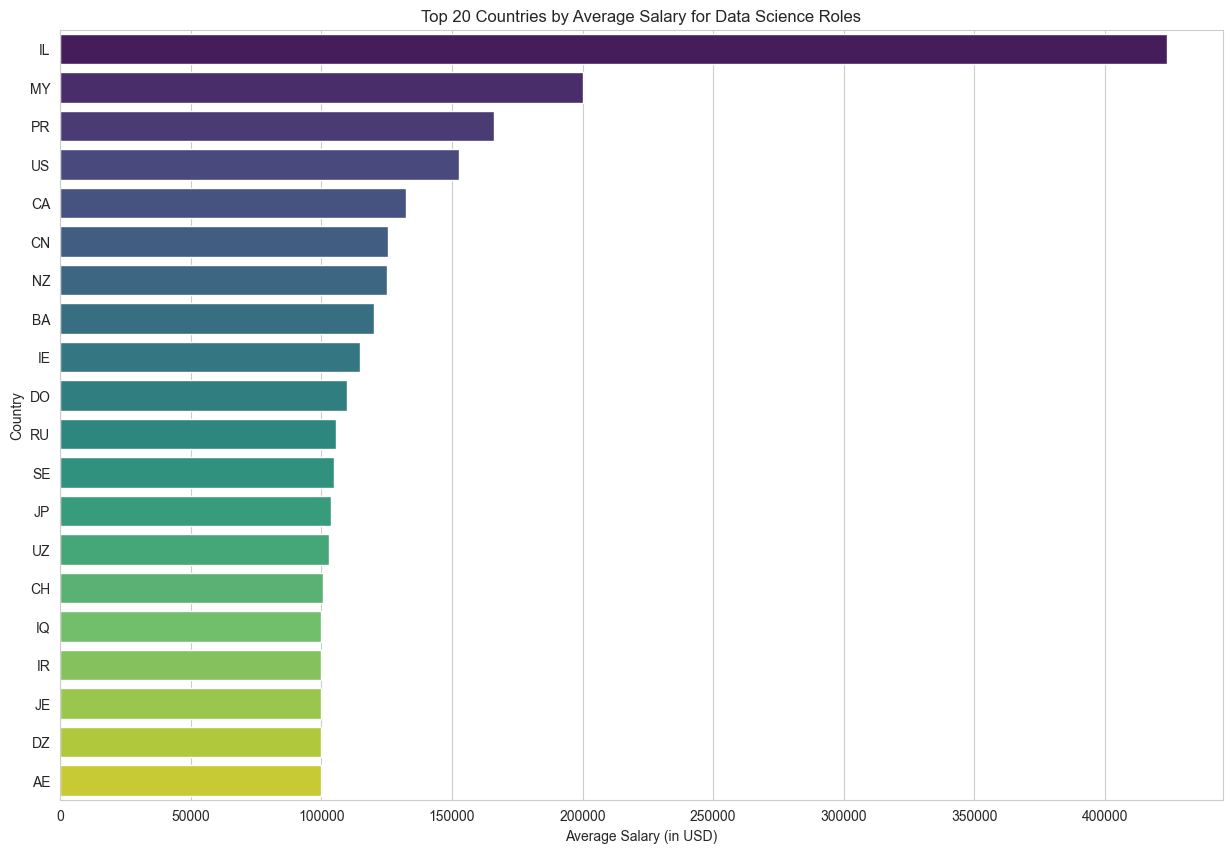

In [17]:
# Grouping by employee_residence to calculate the mean and count of salaries
country_analysis = ds_salaries.groupby('employee_residence').agg({'salary_in_usd': ['mean', 'count']}).reset_index()
country_analysis.columns = ['Country', 'Average Salary', 'Job Listings']

# Sorting by average salary
country_analysis = country_analysis.sort_values(by='Average Salary', ascending=False)

# Plotting the average salary by country
plt.figure(figsize=(15, 10))
sns.barplot(x='Average Salary', y='Country', data=country_analysis.head(20), palette="viridis")
plt.title('Top 20 Countries by Average Salary for Data Science Roles')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Country')
plt.show()

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\1536501947.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job Listings', y='Country', data=country_analysis_sorted_by_demand.head(20), palette="viridis")
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:94

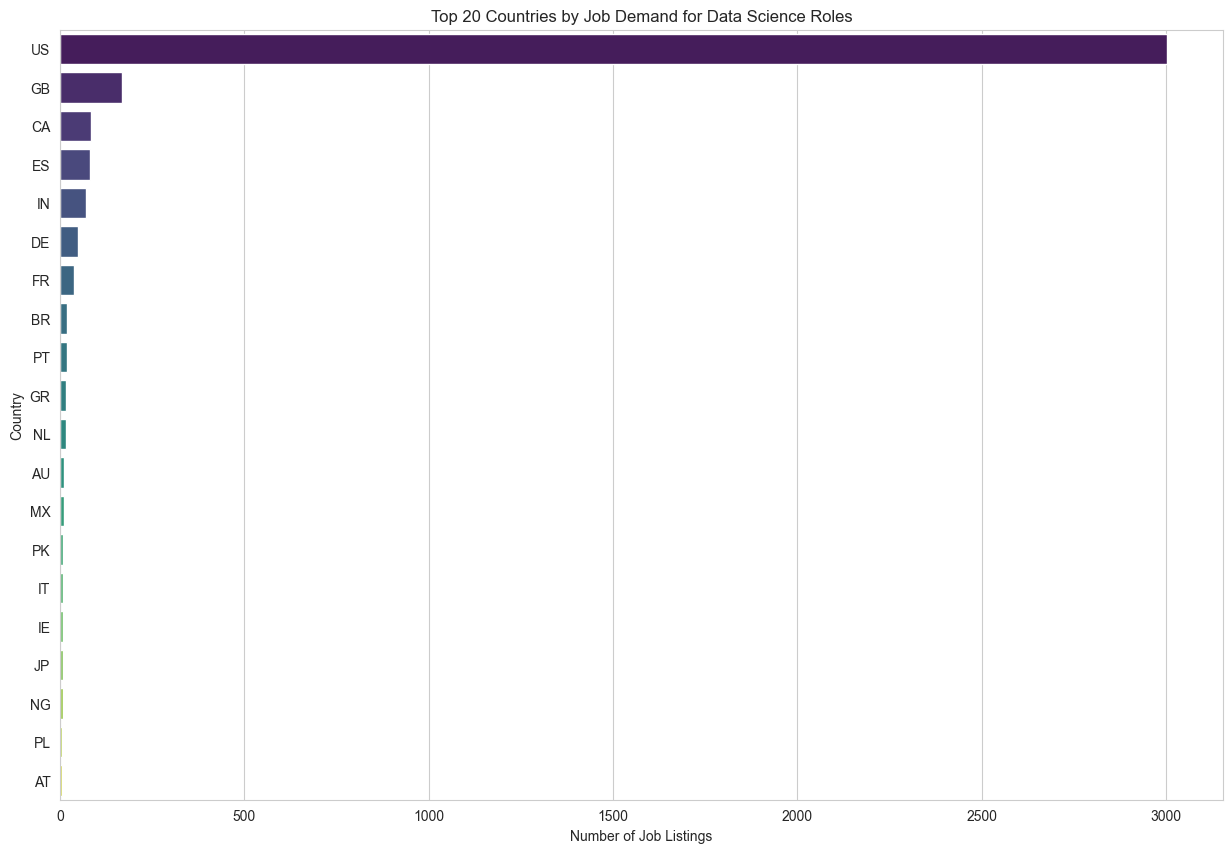

In [18]:
# Sorting by job listings to get countries with the highest demand
country_analysis_sorted_by_demand = country_analysis.sort_values(by='Job Listings', ascending=False)

# Plotting the job demand by country
plt.figure(figsize=(15, 10))
sns.barplot(x='Job Listings', y='Country', data=country_analysis_sorted_by_demand.head(20), palette="viridis")
plt.title('Top 20 Countries by Job Demand for Data Science Roles')
plt.xlabel('Number of Job Listings')
plt.ylabel('Country')
plt.show()

Now performing Time Series Analysis, given that our dataset has a work_year column, we can explore:

* **Salary Trends Over Time:** Analyze how the average salary in USD has changed over the years.

* **Job Listings Over Time:** Examine how the number of job listings (or entries) has evolved over time, which can provide insights into the demand for data science roles over the years.

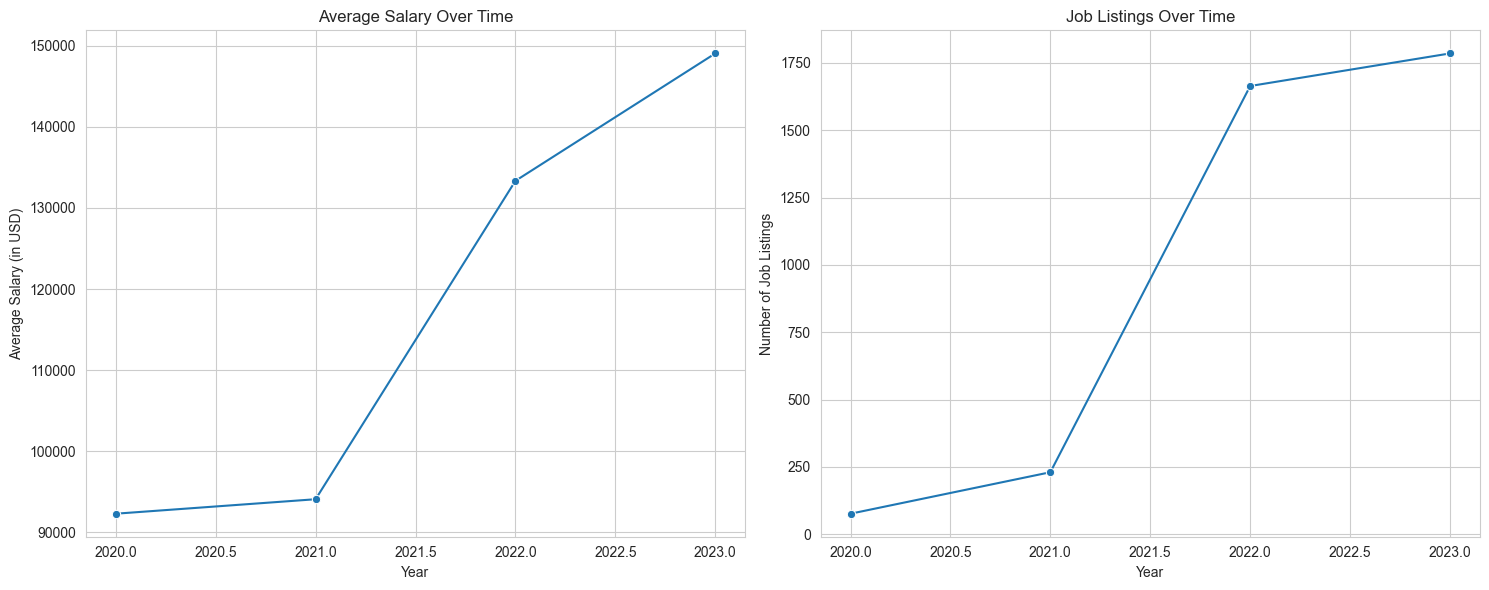

In [19]:
# Grouping by work_year to calculate the mean salary and job listings count
yearly_analysis = ds_salaries.groupby('work_year').agg({'salary_in_usd': ['mean', 'count']}).reset_index()
yearly_analysis.columns = ['Year', 'Average Salary', 'Job Listings']

# Plotting the salary trends over time
plt.figure(figsize=(15, 6))

# Average Salary over Time
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='Average Salary', data=yearly_analysis, marker='o')
plt.title('Average Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary (in USD)')

# Job Listings over Time
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Job Listings', data=yearly_analysis, marker='o')
plt.title('Job Listings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Job Listings')

plt.tight_layout()
plt.show()


In Job Title Analysis, we can explore:

* **Salary Distribution by Job Title:** Analyze how the average salary in USD varies across different job titles.

* **Job Demand by Job Title:** Examine which job titles have the most listings, indicating the demand for specific roles.

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\1809956925.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='job_title', x='salary_in_usd', data=top_titles_data, palette="viridis", order=top_10_titles)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need t

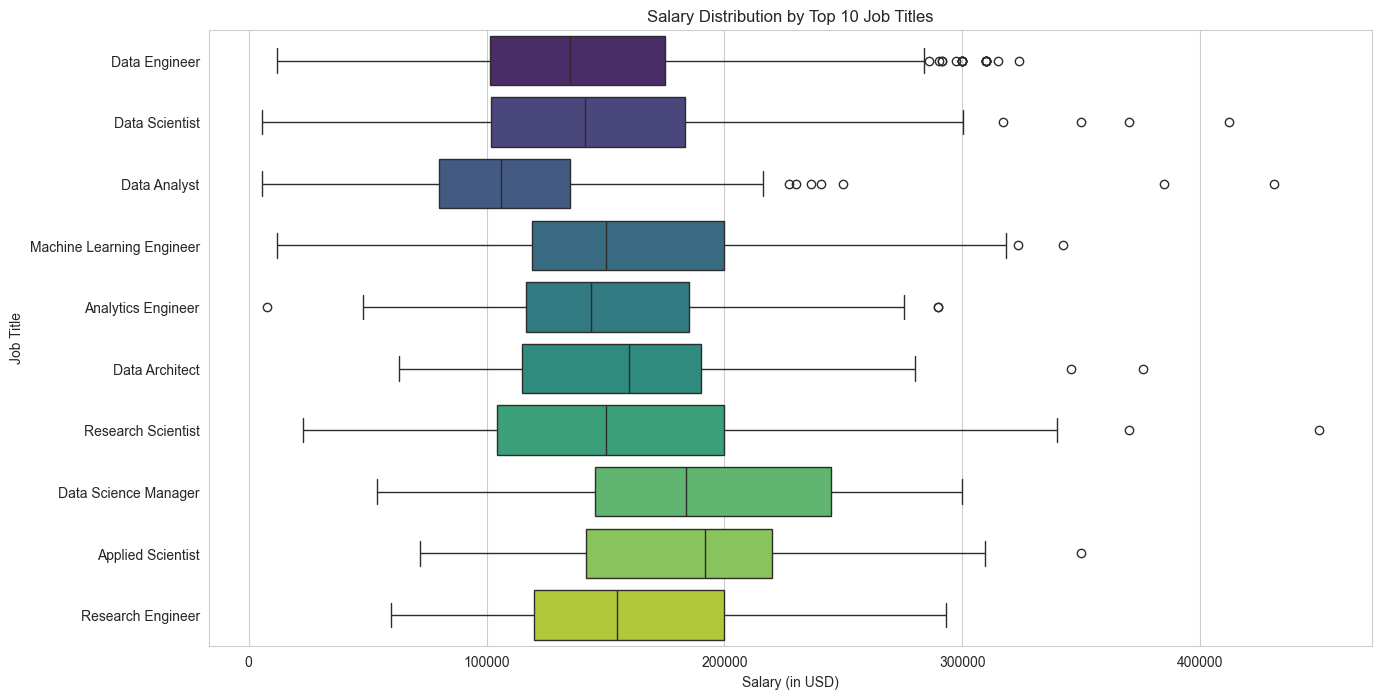

In [20]:
# Top 10 job titles based on frequency
top_10_titles = ds_salaries['job_title'].value_counts().head(10).index

# Filtering the dataset to consider only the top 10 job titles
top_titles_data = ds_salaries[ds_salaries['job_title'].isin(top_10_titles)]

# Plotting the average salary distribution by job title
plt.figure(figsize=(15, 8))
sns.boxplot(y='job_title', x='salary_in_usd', data=top_titles_data, palette="viridis", order=top_10_titles)
plt.title('Salary Distribution by Top 10 Job Titles')
plt.xlabel('Salary (in USD)')
plt.ylabel('Job Title')
plt.show()

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\3870524965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title', data=top_titles_data, order=top_10_titles, palette="viridis")
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: Wh

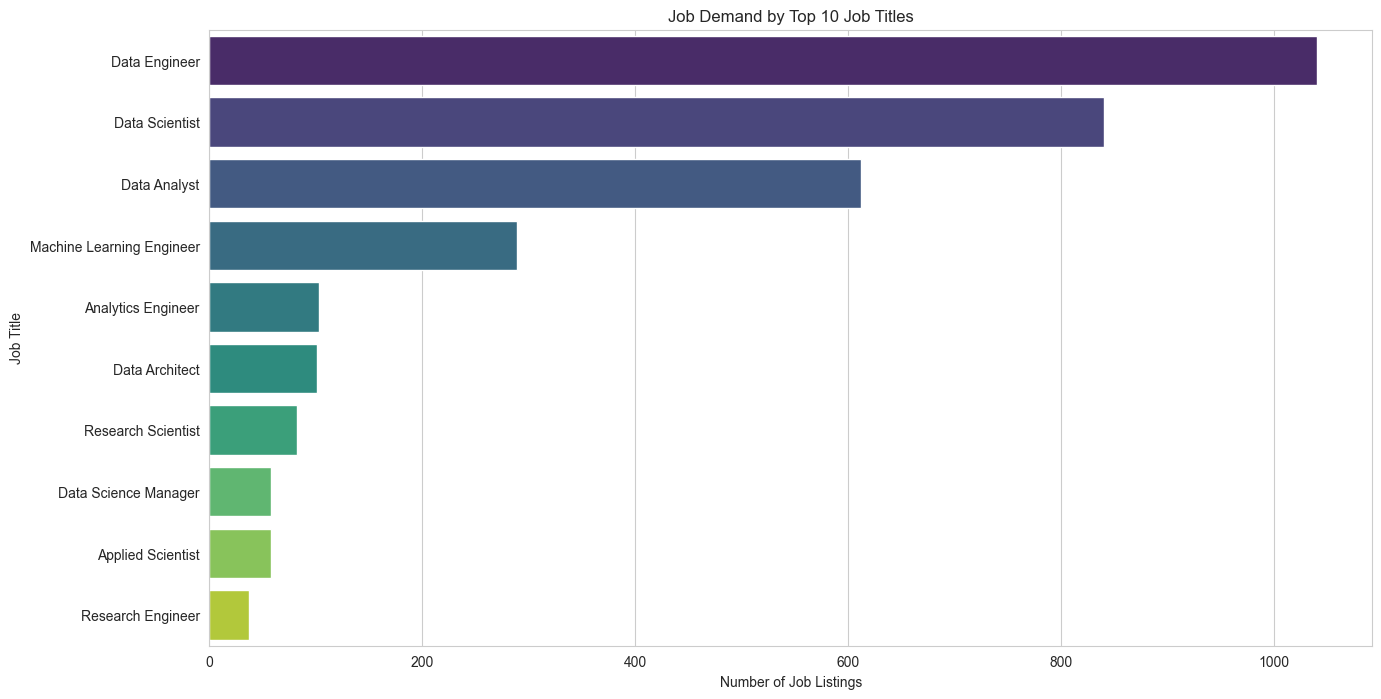

In [21]:
# Plotting the job demand by top job titles
plt.figure(figsize=(15, 8))
sns.countplot(y='job_title', data=top_titles_data, order=top_10_titles, palette="viridis")
plt.title('Job Demand by Top 10 Job Titles')
plt.xlabel('Number of Job Listings')
plt.ylabel('Job Title')
plt.show()

In Company Analysis, we are looking into:

* **Salary Distribution by Company Size:** Examine how the average salary in USD varies across different company sizes (small, medium, large).

* **Job Demand by Company Size:** Analyze which company sizes have the most job listings, indicating the demand for data science roles in these companies.

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\2360464035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='salary_in_usd', data=ds_salaries, palette="viridis", order=['S', 'M', 'L'])
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need 

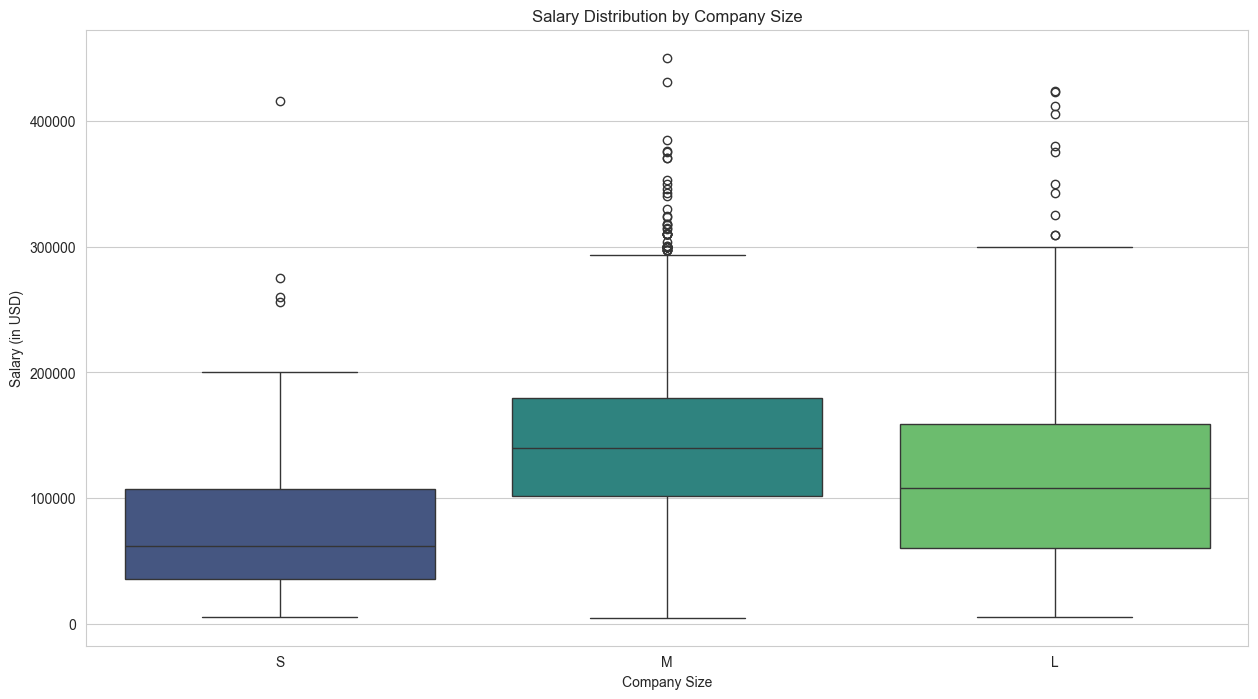

In [22]:
# Plotting the salary distribution by company size
plt.figure(figsize=(15, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=ds_salaries, palette="viridis", order=['S', 'M', 'L'])
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (in USD)')
plt.show()

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\2960278808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='company_size', data=ds_salaries, palette="viridis", order=['S', 'M', 'L'])
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: W

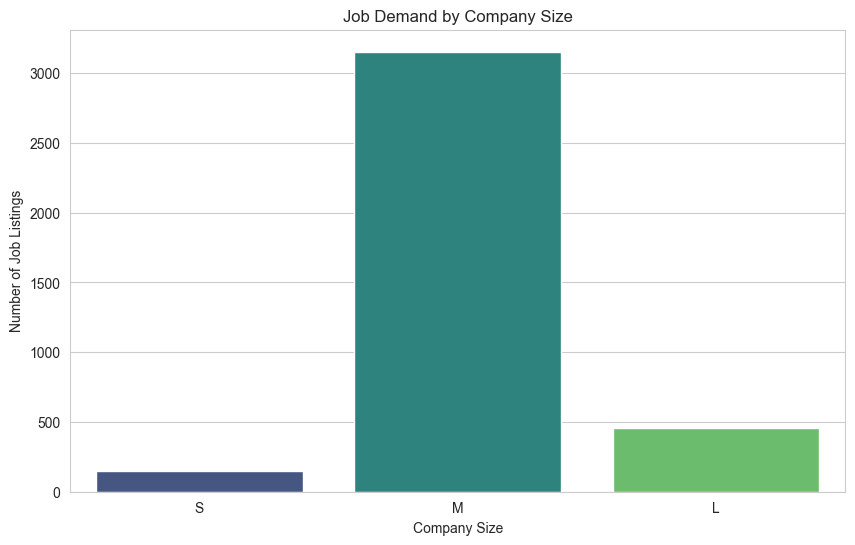

In [23]:
# Plotting the job demand by company size
plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', data=ds_salaries, palette="viridis", order=['S', 'M', 'L'])
plt.title('Job Demand by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Job Listings')
plt.show()

In Remote Work Analysis, we are exploring:

* **Salary Distribution by Remote Ratio:** Examine how the average salary in USD varies with the percentage of remote work.

* **Job Titles and Remote Work:** Analyze which job titles tend to have more remote work opportunities.

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\3462007980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='remote_ratio', y='salary_in_usd', data=ds_salaries, palette="viridis")
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

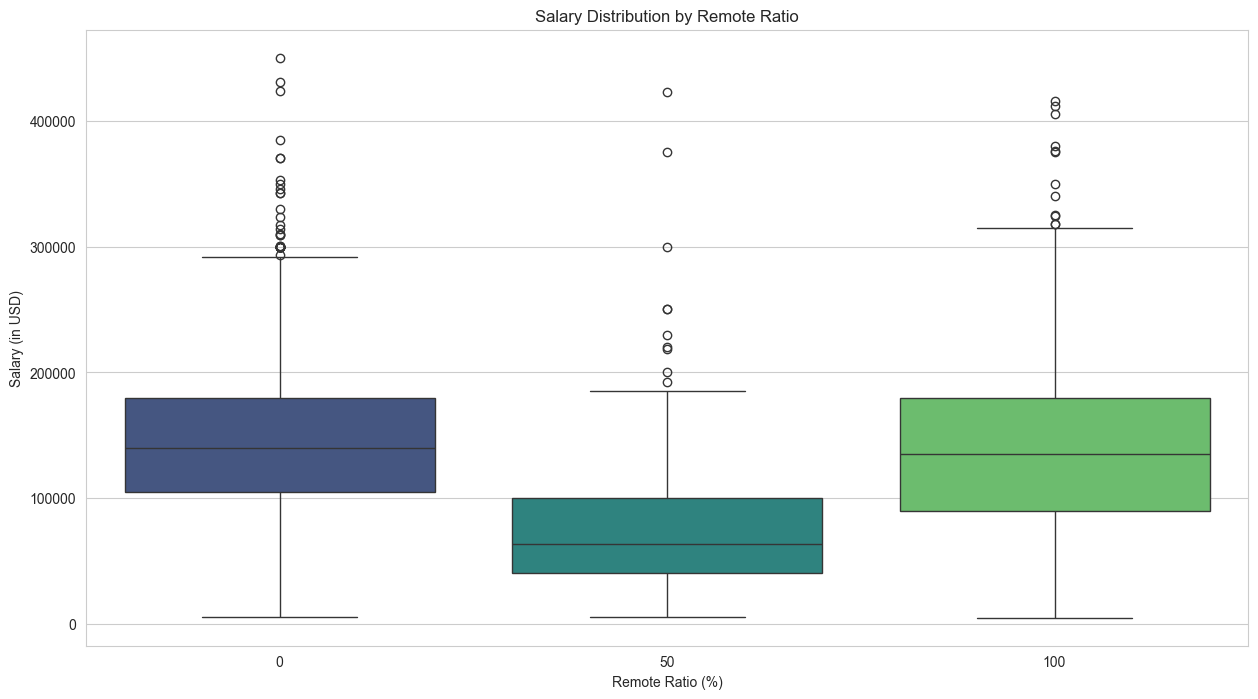

In [24]:
# Plotting the salary distribution by remote ratio
plt.figure(figsize=(15, 8))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=ds_salaries, palette="viridis")
plt.title('Salary Distribution by Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')
plt.show()

d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


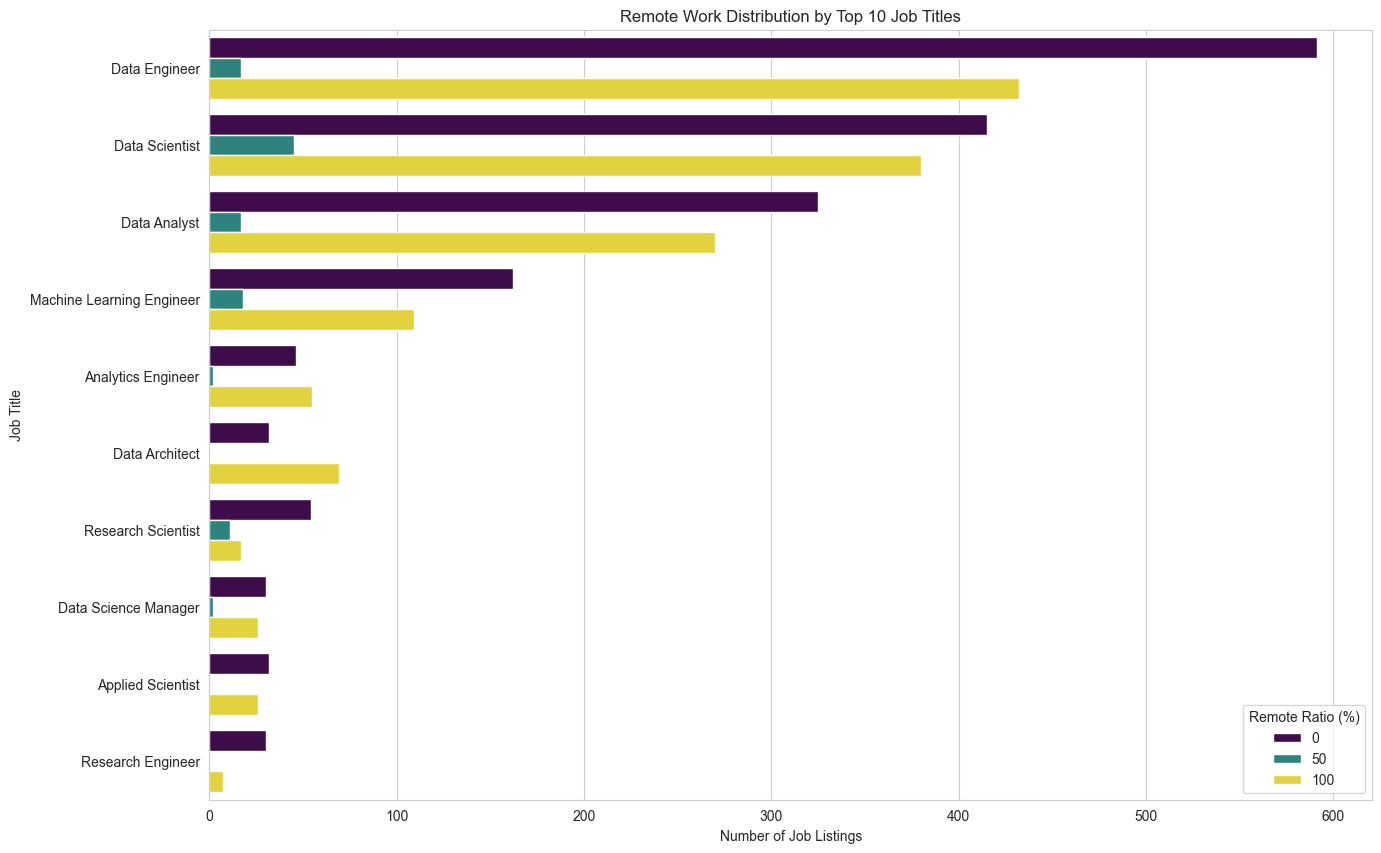

In [25]:
# Filtering the dataset for top job titles
top_titles_remote_data = ds_salaries[ds_salaries['job_title'].isin(top_10_titles)]

# Plotting the remote work distribution by top job titles
plt.figure(figsize=(15, 10))
sns.countplot(y='job_title', hue='remote_ratio', data=top_titles_remote_data, palette="viridis", order=top_10_titles)
plt.title('Remote Work Distribution by Top 10 Job Titles')
plt.xlabel('Number of Job Listings')
plt.ylabel('Job Title')
plt.legend(title='Remote Ratio (%)')
plt.show()

For the Experience Level Analysis, we are delving into:

* **Salary Distribution by Experience Level:** Examine how the average salary in USD varies across different experience levels.

* **Remote Work by Experience Level:** Analyze the distribution of remote work opportunities across experience levels.

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\3904147517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_salaries, palette="viridis", order=['SE', 'MI', 'EN', 'EX'])
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, y

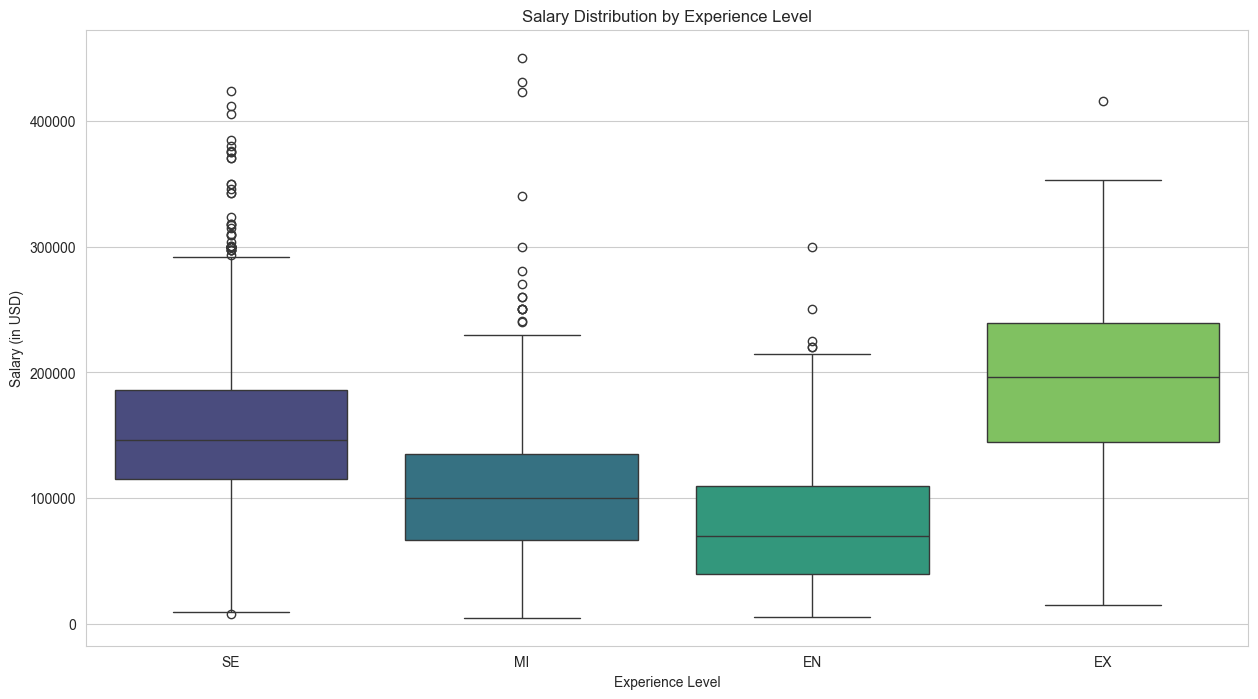

In [26]:
# Plotting the salary distribution by experience level
plt.figure(figsize=(15, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_salaries, palette="viridis", order=['SE', 'MI', 'EN', 'EX'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')
plt.show()

d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


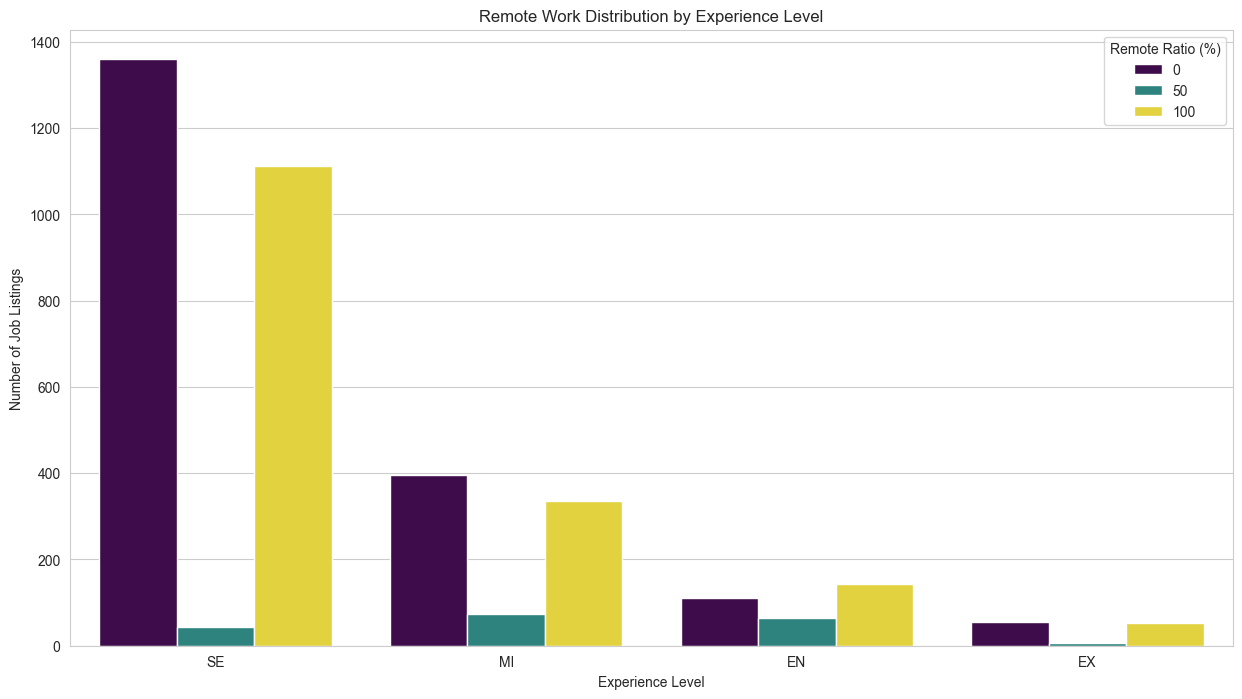

In [27]:
# Plotting the remote work distribution by experience level
plt.figure(figsize=(15, 8))
sns.countplot(x='experience_level', hue='remote_ratio', data=ds_salaries, palette="viridis", order=['SE', 'MI', 'EN', 'EX'])
plt.title('Remote Work Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Listings')
plt.legend(title='Remote Ratio (%)')
plt.show()

For the Employment Type Analysis, we are exploring:

* **Salary Distribution by Employment Type:** Analyze how the average salary in USD varies across different employment types.

* **Remote Work by Employment Type:** Examine the distribution of remote work opportunities based on employment type.

C:\Users\ZackRyu\AppData\Local\Temp\ipykernel_16744\2321138814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='employment_type', y='salary_in_usd', data=ds_salaries, palette="viridis", order=['FT', 'PT', 'CT', 'FL'])
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, yo

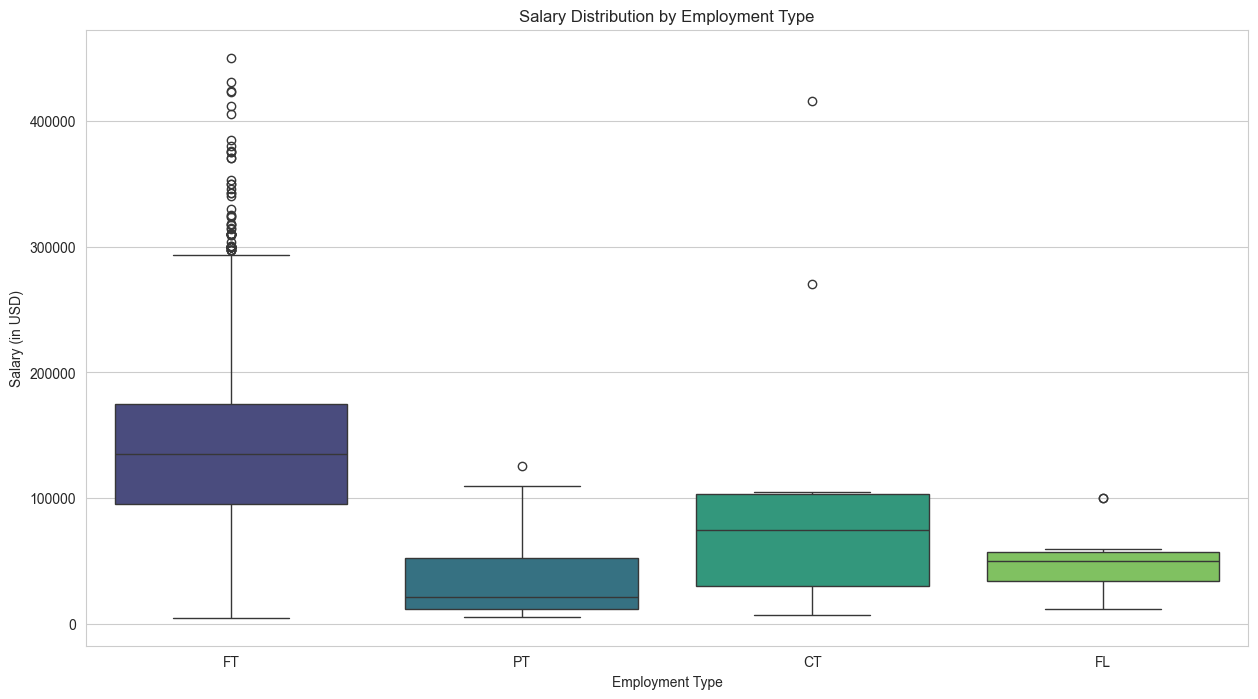

In [28]:
# Plotting the salary distribution by employment type
plt.figure(figsize=(15, 8))
sns.boxplot(x='employment_type', y='salary_in_usd', data=ds_salaries, palette="viridis", order=['FT', 'PT', 'CT', 'FL'])
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')
plt.show()

d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Python\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


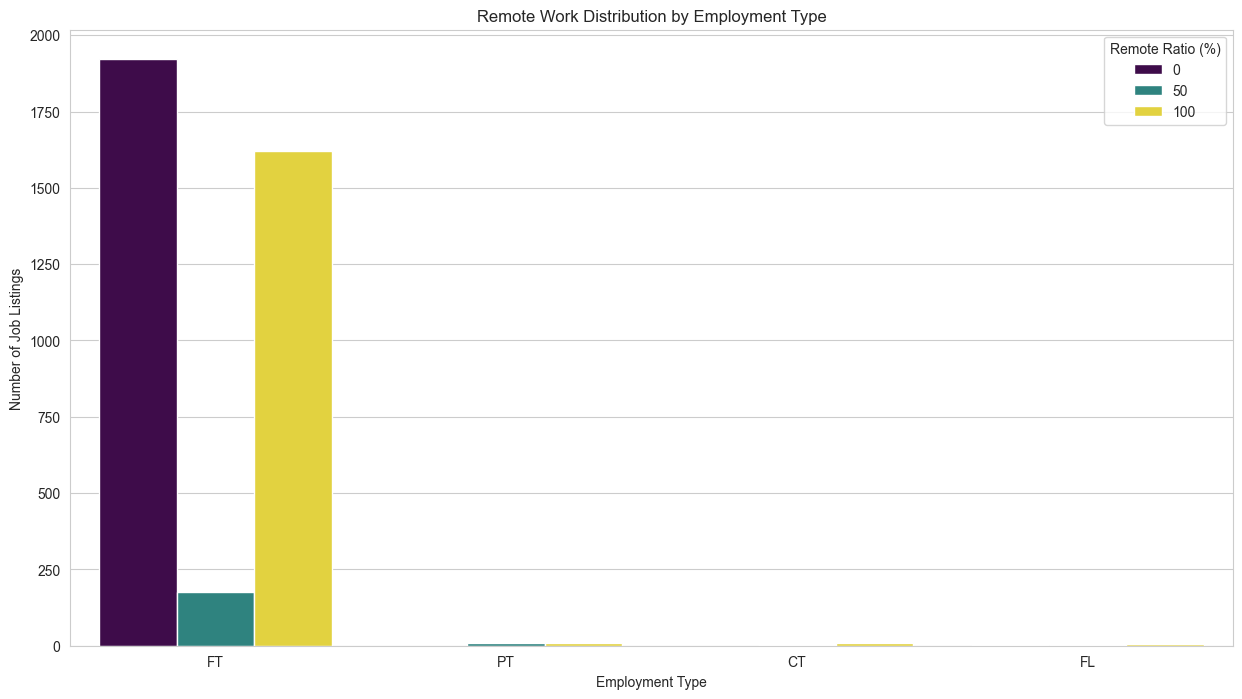

In [29]:
# Plotting the remote work distribution by employment type
plt.figure(figsize=(15, 8))
sns.countplot(x='employment_type', hue='remote_ratio', data=ds_salaries, palette="viridis", order=['FT', 'PT', 'CT', 'FL'])
plt.title('Remote Work Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Job Listings')
plt.legend(title='Remote Ratio (%)')
plt.show()